In [5]:
import pandas as pd
import numpy as np

import time

import matplotlib.pyplot as plt
%matplotlib inline

from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_SFS
from sklearn.tree import DecisionTreeClassifier


from sklearn.decomposition import PCA, FactorAnalysis
from sklearn.metrics import accuracy_score

from sklearn.exceptions import DataConversionWarning, ConvergenceWarning
import warnings
warnings.filterwarnings(action='ignore', category=DataConversionWarning)
warnings.filterwarnings(action='ignore', category=ConvergenceWarning)

from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

import pandas_profiling

# Dimentionality reduction

In [30]:
tr_data = pd.read_csv('data/gisette_train.data', delim_whitespace=True, header=None)
tr_labels = pd.read_csv('data/gisette_train.labels', delim_whitespace=True, header=None)
test_data = pd.read_csv('data/gisette_valid.data', delim_whitespace=True, header=None)
test_labels = pd.read_csv('data/gisette_valid.labels', delim_whitespace=True, header=None)

In [37]:
del tr_data[4999]
del test_data[4999]

### 1.2. Read the description of the problem and try to solve it using Logistic Regression (without dimentionality reduction).

start_time = time.time()

lr = LogisticRegression(solver='lbfgs')
lr.fit(tr_data, tr_labels)
log_reg_pred = lr.predict(test_data)

log_reg_time = time.time() - start_time
log_reg_acc = lr.score(test_data, test_labels)

In [63]:
print('Time to train: ', log_reg_time)
print("Accuracy: ", log_reg_acc)

Time to train:  11.381987571716309
Accuracy:  0.978


This approach is not too efficient, because it took quite a long time, but the accuracy is rather high.

### 1.3. Apply PCA algorithm to reduce dimentionality of your data (use n = (5, 10, 20, 50, 100) as a number of components).

In [108]:
ns = [5, 10, 20, 50, 100]
pca_results = dict()
expl_variance = []
var_sums = []

In [109]:
for n in ns:

    pca = PCA(n_components=n)

    pca.fit(tr_data)
    pca_tr_data = pca.transform(tr_data)
    pca_test_data = pca.transform(test_data)
    expl_variance.append(pca.explained_variance_ratio_)
    var_sums.append(pca.explained_variance_ratio_.sum())
    
    pca_start_time = time.time()
    pca_lr = LogisticRegression(solver='lbfgs')
    pca_lr.fit(pca_tr_data, tr_labels)
    pca_time = time.time() - pca_start_time
    
    pca_pred = pca_lr.predict(pca_test_data)
    pca_score = accuracy_score(test_labels, pca_pred)
    
    pca_results[n] = [pca_score, pca_time]

In [110]:
pca_results

{5: [0.854, 0.028002500534057617],
 10: [0.917, 0.06400084495544434],
 20: [0.936, 0.0630044937133789],
 50: [0.971, 0.06101107597351074],
 100: [0.967, 0.23200392723083496]}

In [111]:
expl_variance

[array([0.05111657, 0.03728399, 0.03023547, 0.02324838, 0.02109714]),
 array([0.05111657, 0.03728399, 0.03023547, 0.02324838, 0.02109714,
        0.01705272, 0.01479865, 0.01283174, 0.01102159, 0.00955193]),
 array([0.05111657, 0.03728399, 0.03023547, 0.02324838, 0.02109714,
        0.01705272, 0.01479865, 0.01283175, 0.0110216 , 0.00955193,
        0.00913704, 0.00854157, 0.00726065, 0.00666925, 0.00598569,
        0.00523631, 0.00509431, 0.00484852, 0.00475099, 0.00425165]),
 array([0.05111657, 0.03728399, 0.03023547, 0.02324838, 0.02109714,
        0.01705272, 0.01479865, 0.01283175, 0.0110216 , 0.00955193,
        0.00913704, 0.00854157, 0.00726065, 0.00666925, 0.00598571,
        0.00523657, 0.00509451, 0.0048491 , 0.00475114, 0.00425184,
        0.00392864, 0.00383051, 0.00369059, 0.00350028, 0.00343813,
        0.00327486, 0.00313525, 0.00307983, 0.00294967, 0.00279633,
        0.00257806, 0.00254633, 0.00239595, 0.00238079, 0.0023084 ,
        0.00223203, 0.0021612 , 0.0020608 

In [112]:
var_sums

[0.1629815506044868,
 0.22823817796476562,
 0.2900141722216054,
 0.3624961114680135,
 0.41478952285118853]

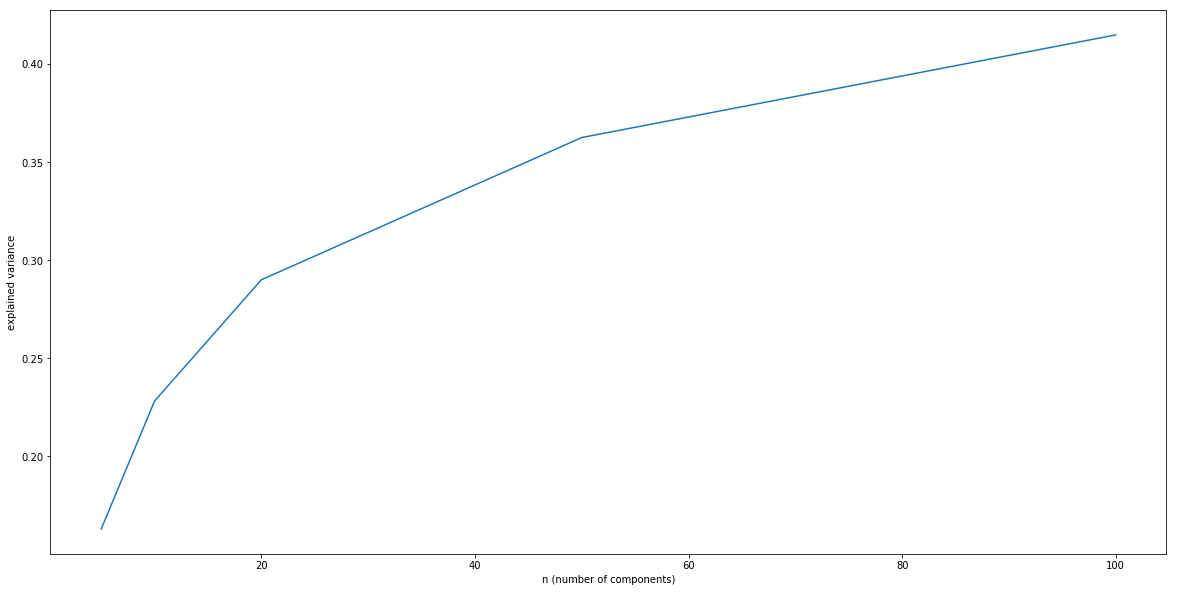

In [113]:
plt.figure(figsize=(20, 10))
plt.ylabel("explained variance")
plt.xlabel("n (number of components)")
plt.plot(ns, var_sums)

Well, we can clearly see that every next number of components explains a smaller amount of variance. (Take a look at arrays in ```expl_variance``` array)

### 1.4. Apply Factor Analysis technique to reduce dimentionality of your dataset. Use n = (3, 5, 10, 20, 50) as a number of factors.

In [117]:
fa_ns = [3, 5, 10, 20, 50]
fa_results = dict()

In [118]:
for fa_n in fa_ns:
    fa = FactorAnalysis(n_components=fa_n)
    fa.fit(tr_data)
    fa_tr_data = fa.transform(tr_data)
    fa_test_data = fa.transform(test_data)    
    
    fa_start_time = time.time()
    fa_lr = LogisticRegression(solver='lbfgs')
    fa_lr.fit(fa_tr_data, tr_labels)
    fa_time = time.time() - fa_start_time
    
    fa_pred = fa_lr.predict(fa_test_data)
    fa_score = accuracy_score(test_labels, fa_pred)
    
    fa_results[fa_n] = [fa_score, fa_time]

In [119]:
fa_results

{3: [0.737, 0.010999679565429688],
 5: [0.858, 0.014000415802001953],
 10: [0.916, 0.01900339126586914],
 20: [0.948, 0.01800990104675293],
 50: [0.973, 0.0409998893737793]}

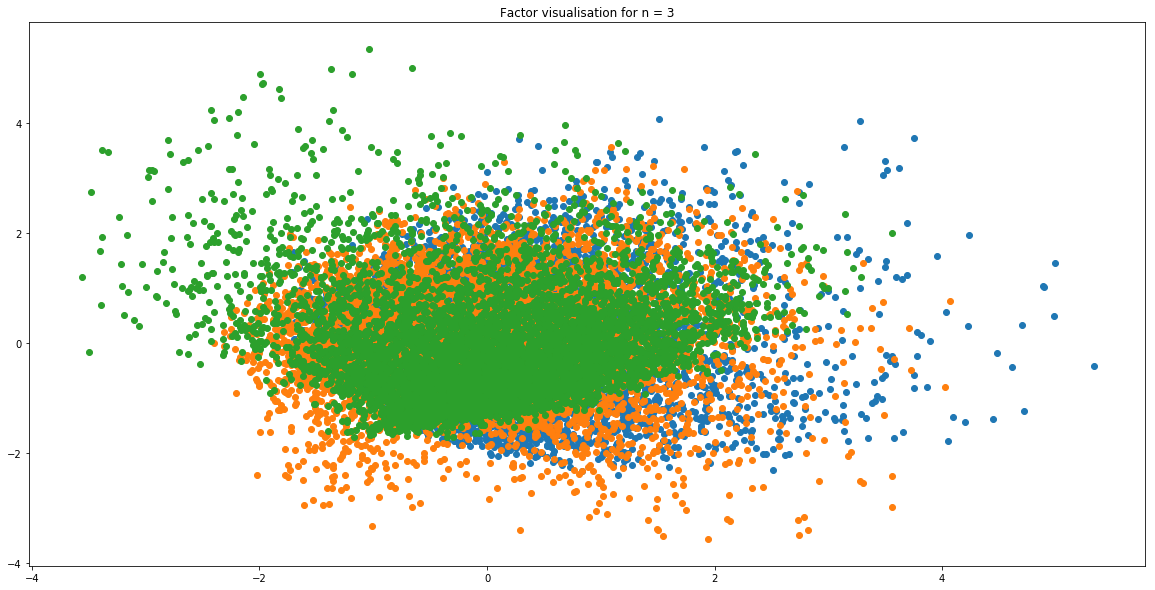

In [127]:
plt.figure(figsize=(20, 10))
plt.title('Factor visualisation for n = 3')
[plt.scatter(fa_tr_data[:,i], fa_tr_data[:,0]) if i == 2 else plt.scatter(fa_tr_data[:,i], fa_tr_data[:,i+1]) for i in range(3)]

In [142]:
for i in range(3):
    if i == 0:
        print("\t\t   Original model:")
        print("Time:", log_reg_time)
        print("Accuracy:", log_reg_acc)
    elif i == 1:
        print("\t\t\tPCA")
        for pca_key in pca_results.keys():
            print("For n = {}: time -- {}, accuracy -- {}".format(pca_key, pca_results[pca_key][1], pca_results[pca_key][0]))
    elif i == 2:
        print("\t\t\tFA")
        for fa_key in fa_results.keys():
            print("For n = {}: time -- {}, accuracy -- {}".format(fa_key, fa_results[fa_key][1], fa_results[fa_key][0]))

		   Original model:
Time: 11.381987571716309
Accuracy: 0.978
			PCA
For n = 5: time -- 0.028002500534057617, accuracy -- 0.854
For n = 10: time -- 0.06400084495544434, accuracy -- 0.917
For n = 20: time -- 0.0630044937133789, accuracy -- 0.936
For n = 50: time -- 0.06101107597351074, accuracy -- 0.971
For n = 100: time -- 0.23200392723083496, accuracy -- 0.967
			FA
For n = 3: time -- 0.010999679565429688, accuracy -- 0.737
For n = 5: time -- 0.014000415802001953, accuracy -- 0.858
For n = 10: time -- 0.01900339126586914, accuracy -- 0.916
For n = 20: time -- 0.01800990104675293, accuracy -- 0.948
For n = 50: time -- 0.0409998893737793, accuracy -- 0.973


### Use-cases 
One of the main use-cases for PAC and FA is PCA to reduce multi-dimensional data 2 or 3 dimensions so that it's easier to plot and hopefully understand the data better. They can also be used to simplify the training process when needed. PCA is particularly useful when there are too many independent variables and they show high correlation.


PCA - rotates the axis of the original variables, using a set of linear transformations. 

Factor analysis - creates a new set of variables to explain the covariances and correlations between the observed variables. Factor analysis assumes and underlying structure that relates the factors to the observed data.

---------------------------------------------------------------------------------------------

#### In factor analysis, a two-factor model is completely different from a three-factor model, whereas in PCA, when we decide to use a third component, the two first principal components remain the same. 
#### PCA is fast and straightforward. In factor analysis - various alternatives, some of them are complicated and time consuming.

---
# Feature selection

In [163]:
df = pd.read_csv('data/spambase.data', names=["word_freq_make", "word_freq_address", "word_freq_all", "word_freq_3d", "word_freq_our", "word_freq_over", "word_freq_remove", "word_freq_internet", "word_freq_order", "word_freq_mail", "word_freq_receive", "word_freq_will", "word_freq_people", "word_freq_report", "word_freq_addresses", "word_freq_free", "word_freq_business", "word_freq_email", "word_freq_you", "word_freq_credit", "word_freq_your", "word_freq_font", "word_freq_000", "word_freq_money", "word_freq_hp", "word_freq_hpl", "word_freq_george", "word_freq_650", "word_freq_lab", "word_freq_labs", "word_freq_telnet", "word_freq_857", "word_freq_data", "word_freq_415", "word_freq_85", "word_freq_technology", "word_freq_1999", "word_freq_parts", "word_freq_pm", "word_freq_direct", "word_freq_cs", "word_freq_meeting", "word_freq_original", "word_freq_project", "word_freq_re", "word_freq_edu", "word_freq_table", "word_freq_conference", "char_freq_;", "char_freq_(", "char_freq_[", "char_freq_!", "char_freq_$", "char_freq_#", "capital_run_length_average", "capital_run_length_longest", "capital_run_length_total", "y"])
df.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,y
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [185]:
Y = df["y"]
X = df.drop("y", axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

In [197]:
lr = LogisticRegression(solver='lbfgs')
lr.fit(X_train, Y_train)

test_pred = lr.predict(X_test)
train_pred = lr.predict(X_train)

original_test_acc = accuracy_score(Y_test, test_pred)
original_train_acc = accuracy_score(Y_train, train_pred)

print("Test accuracy:", original_test_acc)
print("Train accuracy:", original_train_acc)

Test accuracy: 0.9203475742215785
Train accuracy: 0.9229813664596274


### Apply Forward Stepwise Selection technique

In [257]:
X_train_sfs = X_train.copy()
X_test_sfs = X_test.copy()
Y_train_sfs = Y_train.copy()
Y_test_sfs = Y_test.copy()

In [258]:
sfs = SFS(estimator=lr, 
           k_features = 10,
           forward = True, 
           floating = False, 
           scoring = "accuracy",
           cv=0)

sfs.fit(X_train_sfs, Y_train_sfs)

SequentialFeatureSelector(clone_estimator=True, cv=0,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False),
             floating=False, forward=True, k_features=10, n_jobs=1,
             pre_dispatch='2*n_jobs', scoring='accuracy', verbose=0)

In [259]:
print("Accuracy:", sfs.k_score_)
print("SFS subsets")
sfs.subsets_

Accuracy: 0.9118012422360249
SFS subsets


{1: {'feature_idx': (52,),
  'cv_scores': array([0.77173913]),
  'avg_score': 0.7717391304347826,
  'feature_names': ('char_freq_$',)},
 2: {'feature_idx': (6, 52),
  'cv_scores': array([0.82204969]),
  'avg_score': 0.8220496894409938,
  'feature_names': ('word_freq_remove', 'char_freq_$')},
 3: {'feature_idx': (6, 51, 52),
  'cv_scores': array([0.84782609]),
  'avg_score': 0.8478260869565217,
  'feature_names': ('word_freq_remove', 'char_freq_!', 'char_freq_$')},
 4: {'feature_idx': (6, 24, 51, 52),
  'cv_scores': array([0.86024845]),
  'avg_score': 0.860248447204969,
  'feature_names': ('word_freq_remove',
   'word_freq_hp',
   'char_freq_!',
   'char_freq_$')},
 5: {'feature_idx': (6, 24, 45, 51, 52),
  'cv_scores': array([0.87080745]),
  'avg_score': 0.8708074534161491,
  'feature_names': ('word_freq_remove',
   'word_freq_hp',
   'word_freq_edu',
   'char_freq_!',
   'char_freq_$')},
 6: {'feature_idx': (6, 24, 26, 45, 51, 52),
  'cv_scores': array([0.88944099]),
  'avg_score': 0.

In [260]:
print("Best features:")
sfs.k_feature_names_

Best features:


('word_freq_our',
 'word_freq_remove',
 'word_freq_hp',
 'word_freq_hpl',
 'word_freq_george',
 'word_freq_meeting',
 'word_freq_project',
 'word_freq_edu',
 'char_freq_!',
 'char_freq_$')

C:\Users\schwajka\Anaconda3\lib\site-packages\numpy\core\_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\schwajka\Anaconda3\lib\site-packages\numpy\core\_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


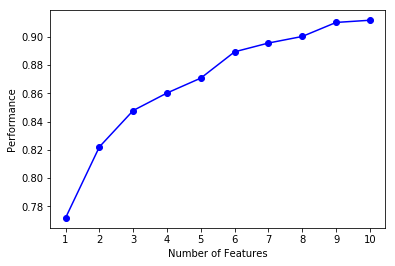

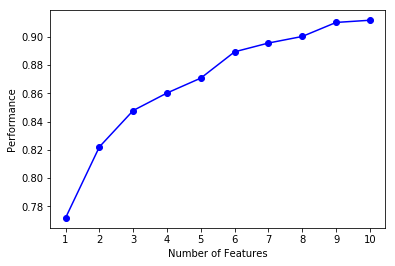

In [261]:
plot_SFS(sfs.get_metric_dict(), kind='std_err')

In [262]:
fss_lr = LogisticRegression(solver='lbfgs')

In [263]:
X_train_sfs = X_train_sfs.iloc[:, list(sfs.k_feature_idx_)]

In [265]:
X_test_sfs = X_test_sfs.iloc[:, list(sfs.k_feature_idx_)]

In [285]:
fss_lr.fit(X_train_sfs, Y_train_sfs)

fss_train_acc = fss_lr.score(X_train_sfs, Y_train_sfs)
print("Training accuracy:", fss_train_acc)

fss_pred = fss_lr.predict(X_test_sfs)
fss_test_acc = accuracy_score(Y_test_sfs, fss_pred)
print("Testing accuracy:", fss_test_acc)

fss_results = [fss_train_acc, fss_test_acc]

Training accuracy: 0.9118012422360249
Testing accuracy: 0.9109341057204924


### Apply Forward Stepwise Selection technique

In [318]:
X_train_sbs = X_train.copy()
X_test_sbs = X_test.copy()
Y_train_sbs = Y_train.copy()
Y_test_sbs = Y_test.copy()

In [319]:
sbs = SFS(estimator=lr, 
           k_features = 10,
           forward = False, 
           floating = False, 
           scoring = "accuracy",
           cv=0,
         )

sbs.fit(X_train_sbs.values, Y_train_sbs.values)

SequentialFeatureSelector(clone_estimator=True, cv=0,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False),
             floating=False, forward=False, k_features=10, n_jobs=1,
             pre_dispatch='2*n_jobs', scoring='accuracy', verbose=0)

In [320]:
sbs.k_feature_names_

('4', '6', '15', '23', '24', '26', '41', '45', '52', '54')

In [321]:
print("Accuracy:", sbs.k_score_)
print("SFS subsets")
sbs.subsets_

Accuracy: 0.9083850931677019
SFS subsets


{57: {'feature_idx': (0,
   1,
   2,
   3,
   4,
   5,
   6,
   7,
   8,
   9,
   10,
   11,
   12,
   13,
   14,
   15,
   16,
   17,
   18,
   19,
   20,
   21,
   22,
   23,
   24,
   25,
   26,
   27,
   28,
   29,
   30,
   31,
   32,
   33,
   34,
   35,
   36,
   37,
   38,
   39,
   40,
   41,
   42,
   43,
   44,
   45,
   46,
   47,
   48,
   49,
   50,
   51,
   52,
   53,
   54,
   55,
   56),
  'cv_scores': array([0.92298137]),
  'avg_score': 0.9229813664596274,
  'feature_names': ('0',
   '1',
   '2',
   '3',
   '4',
   '5',
   '6',
   '7',
   '8',
   '9',
   '10',
   '11',
   '12',
   '13',
   '14',
   '15',
   '16',
   '17',
   '18',
   '19',
   '20',
   '21',
   '22',
   '23',
   '24',
   '25',
   '26',
   '27',
   '28',
   '29',
   '30',
   '31',
   '32',
   '33',
   '34',
   '35',
   '36',
   '37',
   '38',
   '39',
   '40',
   '41',
   '42',
   '43',
   '44',
   '45',
   '46',
   '47',
   '48',
   '49',
   '50',
   '51',
   '52',
   '53',
   '54',
   '55',
   '56')}

In [328]:
print("Best features:")
sbs.k_feature_idx_

Best features:


(4, 6, 15, 23, 24, 26, 41, 45, 52, 54)

In [323]:
bss_lr = LogisticRegression(solver='lbfgs')

In [324]:
X_train_sbs = X_train_sbs.iloc[:, list(sfs.k_feature_idx_)]
X_test_sbs = X_test_sbs.iloc[:, list(sbs.k_feature_idx_)]

In [325]:
bss_lr.fit(X_train_sbs, Y_train_sbs)

bss_train_acc = bss_lr.score(X_train_sbs, Y_train_sbs)
print("Training accuracy:", bss_train_acc)

bss_pred = bss_lr.predict(X_test_sbs)
bss_test_acc = accuracy_score(Y_test_sbs, bss_pred)
print("Testing accuracy:", bss_test_acc)

bss_results = [bss_train_acc, bss_test_acc]

Training accuracy: 0.9118012422360249
Testing accuracy: 0.48081100651701664


#### FSS and BSS found almost the same list of best features. 

## Decision Trees

In [344]:
X_train_tree = X_train.copy()
X_test_tree = X_test.copy()
Y_train_tree = Y_train.copy()
Y_test_tree = Y_test.copy()

In [338]:
tree = DecisionTreeClassifier()
tree.fit(X_train, Y_train)

In [343]:
impors = dict()
for i in range(len(tree.feature_importances_)):
    impors[i] = tree.feature_importances_[i]
for i in range(56):
    if impors[i] == 0.0:
        impors.pop(i)
impors

{0: 0.003647240794205372,
 1: 0.004336220134919828,
 2: 0.007911521157219902,
 4: 0.013075402893421236,
 5: 0.0004227665878943474,
 6: 0.1086113384664133,
 7: 0.014430088150268245,
 8: 0.0021869938579726594,
 9: 0.010499223097327466,
 10: 0.005495133170423484,
 11: 0.00922931984053084,
 12: 0.0006491987838611603,
 13: 0.003030646463370281,
 15: 0.05528921485678663,
 16: 0.015598571640228126,
 17: 0.005449631407461094,
 18: 0.018818703878663443,
 19: 0.0005967142663097705,
 20: 0.017800527896716812,
 21: 0.0015692253221520909,
 23: 0.006467874354151178,
 24: 0.047224219580342806,
 25: 0.004491034381552336,
 26: 0.017802111335566133,
 27: 0.009614802275267948,
 28: 0.0022443729384914396,
 29: 0.0024177058157588025,
 32: 0.002431075112856967,
 34: 0.0012739511840931222,
 35: 0.002624868789511094,
 36: 0.0025094510981000626,
 37: 0.0012348967030714187,
 38: 0.003582359420359278,
 39: 0.0005650660673277633,
 41: 0.017611771185209003,
 42: 0.003165638435968631,
 44: 0.0021775464340786257,
 4

In the cell above we can see how important each feature is

In [348]:
X_train_tree = X_train_tree.iloc[:, list(impors.keys())]
X_test_tree = X_test_tree.iloc[:, list(impors.keys())]

In [350]:
tree_lr = LogisticRegression(solver='lbfgs')
tree_lr.fit(X_train_tree, Y_train_tree)

tree_train_acc = tree_lr.score(X_train_tree, Y_train_tree)
print("Training accuracy:", tree_train_acc)

tree_pred = tree_lr.predict(X_test_tree)
tree_test_acc = accuracy_score(Y_test_tree, tree_pred)
print("Testing accuracy:", tree_test_acc)

tree_results = [tree_train_acc, tree_test_acc]

Training accuracy: 0.9127329192546584
Testing accuracy: 0.9152787834902245


# Conclusion

In [357]:
print("FSS:\n\ttrain:", fss_results[0], "\n\ttest: ", fss_results[1])
print("BSS:\n\ttrain:", bss_results[0], "\n\ttest: ", bss_results[1])
print("Trees:\n\ttrain:", tree_results[0], "\n\ttest: ", tree_results[1])

FSS:
	train: 0.9118012422360249 
	test:  0.9109341057204924
BSS:
	train: 0.9118012422360249 
	test:  0.48081100651701664
Trees:
	train: 0.9127329192546584 
	test:  0.9152787834902245


#### As we can see, we got pretty much the same results, only the BSS test accuracy is much lower than others. Also BSS took a much bigger time to run than others. 